In [1]:
#import dependencies.
import tensorflow as tf
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

df = pd.read_csv('data/data_stress.csv')
df.head(5)


,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [2]:

# preparing the dataset
target = 'Stress Levels'
X = df.drop(target, axis=1)
Y = df[target]
X.fillna(X.mean(), inplace=True)
X.head(20)

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate
0,93.800,25.680,91.840,16.600000,89.84000,99.60,1.840000,74.200000
1,91.640,25.104,91.552,15.880000,89.55200,98.88,1.552000,72.760000
2,60.000,20.000,96.000,10.000000,95.00000,85.00,7.000000,60.000000
3,85.760,23.536,90.768,13.920000,88.76800,96.92,0.768000,68.840000
4,48.120,17.248,97.872,6.496000,96.24800,72.48,8.248000,53.120000
5,56.880,19.376,95.376,9.376000,94.06400,83.44,6.376000,58.440000
6,47.000,16.800,97.200,5.600000,95.80000,68.00,7.800000,52.000000
7,50.000,18.000,99.000,8.000000,97.00000,80.00,9.000000,55.000000
8,45.280,16.112,96.168,4.224000,95.11200,61.12,7.112000,50.280000
9,55.520,19.104,95.104,9.104000,93.65600,82.76,6.104000,57.760000


In [4]:
# Split the data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

num_classes = 5
# Y_train = np.reshape(Y_train, (Y_train.shape[0], 1))
# Y_test = np.reshape(Y_test, (Y_test.shape[0], 1))

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((504, 8), (504,), (126, 8), (126,))

In [5]:
#fix column names
X_train = X_train.rename(columns={'blood oxygen ': 'blood oxygen', 'heart rate ': 'heart rate'})
X_test = X_test.rename(columns={'blood oxygen ': 'blood oxygen', 'heart rate ': 'heart rate'})

# Data preprocessing
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840000,74.20
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552000,72.76
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000000,60.00
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768000,68.84
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248000,53.12
...,...,...,...,...,...,...,...,...
625,69.600,46.500,92.960,10.960,90.960,89.80,3.835742,62.40
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376000,53.44
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000000,78.76
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728000,59.32


In [6]:
# Initialize the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 3877 (15.14 KB)
Trainable params: 3877 (15.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/1000
16/16 [==============================] - 1s 18ms/step - loss: 2.3982 - accuracy: 0.4167 - val_loss: 1.0189 - val_accuracy: 0.5873
Epoch 2/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.8554 - accuracy: 0.7103 - val_loss: 1.0613 - val_accuracy: 0.5714
Epoch 3/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.8000 - accuracy: 0.6567 - val_loss: 0.5711 - val_accuracy: 0.7063
Epoch 4/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.7083 - val_loss: 0.5915 - val_accuracy: 0.6508
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6130 - accuracy: 0.7639 - val_loss: 0.3756 - val_accuracy: 0.9683
Epoch 6/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.5471 - accuracy: 0.7817 - val_loss: 0.3388 - val_accuracy: 0.9048
Epoch 7/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.4246 - accuracy: 0.8452 - val_loss: 0.5095 - val_accuracy: 0.7778
Epoch

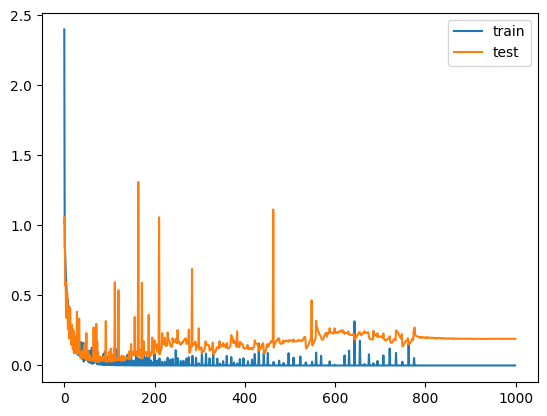

Model saved.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1000, verbose=1)

# Evaluate the model
_, accuracy_train = model.evaluate(X_train, Y_train, verbose=0)
_, accuracy_test = model.evaluate(X_test, Y_test, verbose=0)
print('Train Accuracy: {:.2f}% , Test Accuracy: {:.2f}% '.format(accuracy_train*100, accuracy_test*100))

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Save the model
model.save('stress_model.h5')
print("Model saved.")

In [10]:
# Example input data (you should replace this with your actual input data)
new_data = X_test
expected = Y_test
expected = expected.to_numpy()
# Make predictions
predicted_stress_level = model.predict(X_test)
predicted_stress_level = np.argmax(predicted_stress_level, axis=1)
# Print the predicted stress level
issues = 0
size = len(X_test)
for i in range(0, size):
  if predicted_stress_level[i] != expected[i]:
    issues += 1
    print("Sample", i+1, "- Predicted Stress Level:", predicted_stress_level[i], "Expected:", expected[i])
print("Issues: {} out of {}".format(issues,size))

4/4 [==============================] - 0s 6ms/step
Sample 21 - Predicted Stress Level: 1 Expected: 0
Sample 64 - Predicted Stress Level: 2 Expected: 3
Sample 86 - Predicted Stress Level: 3 Expected: 4
Sample 88 - Predicted Stress Level: 3 Expected: 2
Issues: 4 out of 126


In [11]:
# prompt: i WANT A CONFUSIUON MATRIX FOR y TEST AND Y PRED

import numpy as np
from sklearn.metrics import confusion_matrix

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Print the confusion matrix
print(cm)
len(Y_test), len(X_test)

4/4 [==============================] - 0s 3ms/step
[[24  1  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 28  1  0]
 [ 0  0  1 21  0]
 [ 0  0  0  1 26]]


(126, 126)